In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv',header=1)

# 열 이름 저장
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [ ]:
print(df.info())
print()
print(df.describe())

In [5]:
df['horsepower'].replace('?',np.nan,inplace=True)       # '?'라는 값을 np.nan으로 대체
df.dropna(subset=['horsepower'],axis=0,inplace=True)    # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')     # 문자열 => 실수형

In [ ]:
df.describe

In [6]:
ndf = df[['mpg','cylinders', 'horsepower', 'weight']]
ndf.head(8)

,mpg,cylinders,horsepower,weight
0,15.0,8,165.0,3693
1,18.0,8,150.0,3436
2,16.0,8,150.0,3433
3,17.0,8,140.0,3449
4,15.0,8,198.0,4341
5,14.0,8,220.0,4354
6,14.0,8,215.0,4312
7,14.0,8,225.0,4425


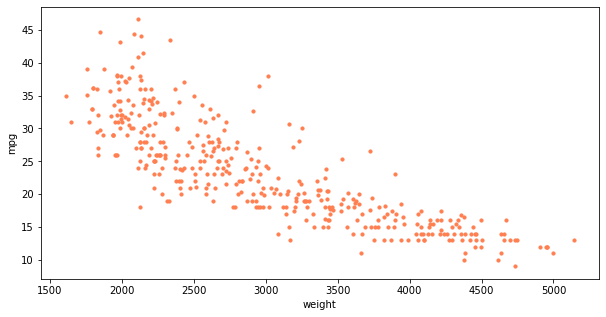

In [4]:
# 산점도 그리기
# x축 데이터로 'weight', y축 데이터로 'mpg' 열을 지정

ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.show()

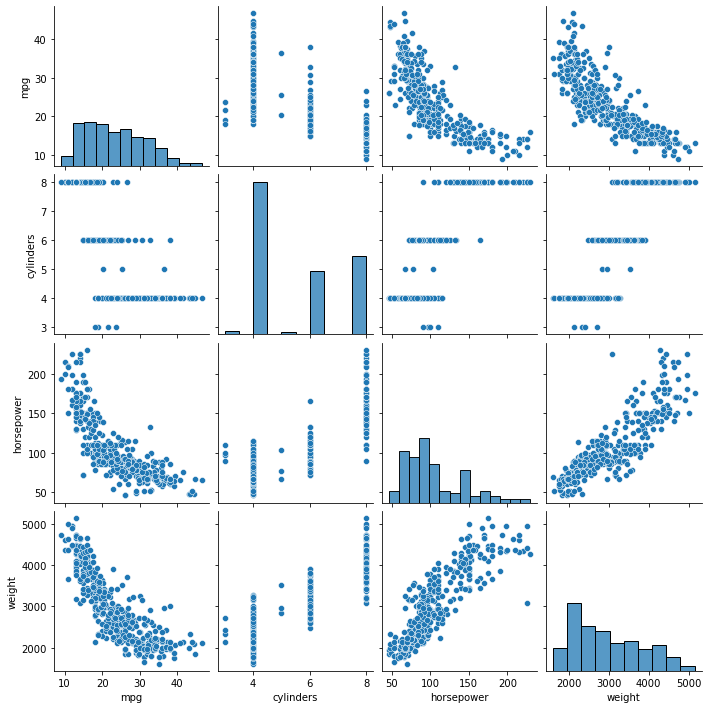

In [5]:
grid_ndf = sns.pairplot(ndf)
plt.show()

In [7]:
# 데이터 셋 구분 - train data / test data...... 7:3 비율

X = ndf[['weight']]     # 독립 변수 X
Y = ndf[['mpg']]        # 종속 변수 Y

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)  # 독립변수, 종속변수, 검증 30%, 랜덤 추출값

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))



train data 개수:  273
test data 개수:  118


In [8]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()     # 단순회귀분석 모형 객체 생성

lr.fit(X_train,Y_train)     # train data를 가지고 모형 학습

r_square = lr.score(X_test,Y_test)      # 학습을 마친 모형에 test data를 적용하여 결졍계수(R-제곱) 계산
print('결정계수: ', r_square)

결정계수:  0.7035812683047353


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


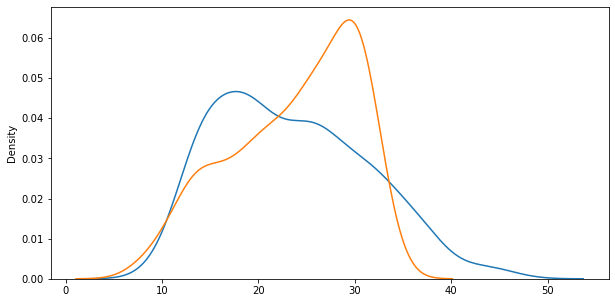

In [13]:
from sklearn.linear_model import LinearRegression

Y_hat = lr.predict(X)  # predict에는 test만 넣는게 사실 더 정확!

plt.figure(figsize = (10,5))
ax1 = sns.distplot(Y, hist=False, label = 'Y')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y_hat', ax = ax1)
plt.show()